<a href="https://colab.research.google.com/github/Harshubh-Meherishi/Neural-Networks-with-PyTorch/blob/master/MNIST_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## Loss Function is Mean Squared Error

!wget -c https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/intro-to-pytorch/helper.py
import torch 
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms

#transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5,),(0.5,),(0.5,))
                               ])

#Download and load the data
trainset = datasets.MNIST('Mnist-data/',download = True, train = True, transform = transform)
trainloader = torch.utils.data.DataLoader(trainset,batch_size = 64, shuffle = True)

--2020-08-30 13:24:35--  https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/intro-to-pytorch/helper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 416 Range Not Satisfiable

    The file is already fully retrieved; nothing to do.



In [2]:
from torch import optim

In [3]:
model = nn.Sequential(nn.Linear(784,128),
                      nn.ReLU(),
                      nn.Linear(128,64),
                      nn.ReLU(),
                      nn.Linear(64,10),
                      nn.LogSoftmax(dim = 1))
#define the loss
criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr =0.003)

In [4]:
epochs = 5
for e in range(epochs):
  running_loss =0
  for images, labels in trainloader:
    images = images.view(images.shape[0],-1)
    optimizer.zero_grad()
    output = model.forward(images)
    loss = criterion(output,labels)
    loss.backward()
    optimizer.step()
    running_loss += loss.item()
  else:
    print(f"Training Loss: {running_loss/len(trainloader)}")


Training Loss: 1.9144329892546892
Training Loss: 0.8474544360121684
Training Loss: 0.5192153837952787
Training Loss: 0.42768278946754523
Training Loss: 0.3849570936422104


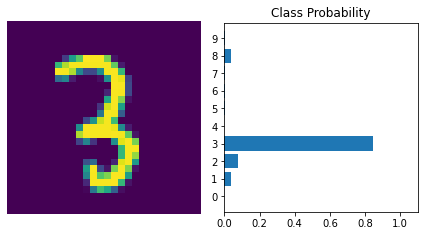

In [7]:
%matplotlib inline
import helper
images,labels = next(iter(trainloader))
img = images[0].view(1,784)
with torch.no_grad():
  logits = model.forward(img)

ps = F.softmax(logits,dim=1)

helper.view_classify(img.view(1,28,28),ps)

